**Markov Chain for Beat Type Transitions**
Analysis
Markov Chain for Beat Type Transitions:
Visualizes the transition probabilities between different cardiac beat types to help predict how a normal or arrhythmic beat may evolve over time, aiding in understanding arrhythmia progression.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the uploaded data file
file_path = '/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv'
data = pd.read_csv(file_path)

data_path = '/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/data.npy'
labels_path = '/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/labels.npy'

# Load the numpy arrays
data_np = np.load(data_path)
labels = np.load(labels_path, allow_pickle=True)

In [ ]:
data

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


Transition Matrix:
             F         N         Q      SVEB       VEB
F     0.007472  0.610212  0.000000  0.004981  0.377335
N     0.008659  0.915699  0.000122  0.012178  0.063342
Q     0.000000  0.800000  0.200000  0.000000  0.000000
SVEB  0.001439  0.394746  0.000000  0.596977  0.006837
VEB   0.001855  0.855329  0.000143  0.002711  0.139963


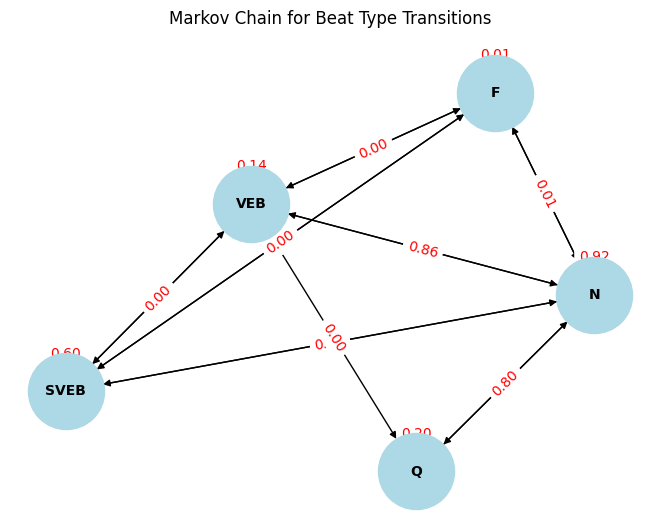

Simulated Sequence of Beat Types:
['N', 'N', 'N', 'F', 'VEB', 'VEB', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'VEB', 'N']


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx



# Extract the sequence of beat types
beat_types = data['type']

# Create a Markov transition matrix
def calculate_transition_matrix(sequence):
    # Count transitions
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(set(sequence))
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

transition_matrix = calculate_transition_matrix(beat_types)

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Markov Chain for Beat Type Transitions")
    plt.savefig("/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/mm1.png", format="png", dpi=300)

    plt.show()

plot_markov_chain(transition_matrix)

# Simulate beat type transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

#  start with a specific beat type and simulate 20 transitions
start_beat = 'N'
simulated_sequence = simulate_markov_chain(transition_matrix, start_beat, 20)
print("Simulated Sequence of Beat Types:")
print(simulated_sequence)


**Transition Probabilities of Intervals:** Analyze RR or QT interval transitions using a Markov framework to capture dynamic changes over time
Markov Chain for Interval Transitions:
Visualizes transitions between discretized interval states (e.g., RR intervals, QT intervals), showing how timing dynamics evolve over time. This highlights the dynamics of heart rate variability and interval fluctuations, which are crucial for detecting irregular rhythms and potential arrhythmias.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

Transition Matrix:
          0         1         2         3         4
0  0.974344  0.025028  0.000525  0.000072  0.000031
1  0.696645  0.298280  0.003947  0.001128  0.000000
2  0.162162  0.702703  0.121622  0.013514  0.000000
3  0.416667  0.583333  0.000000  0.000000  0.000000
4  0.666667  0.333333  0.000000  0.000000  0.000000


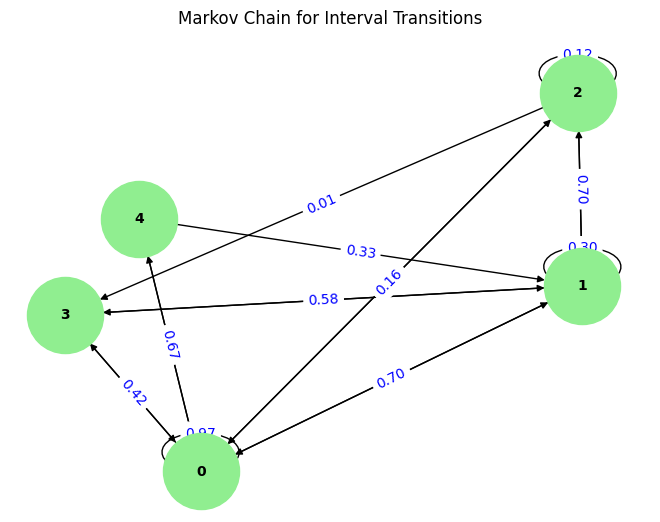

Simulated Sequence of Interval States:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Simulated Interval Ranges:
['11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60', '11.00 - 431.60']


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Choose the interval column for analysis (e.g., '0_pre-RR', '0_qt_interval')
interval_column = '0_pre-RR'

# Discretize intervals into bins for Markov chain states
def discretize_intervals(values, num_bins):
    bins = np.linspace(values.min(), values.max(), num_bins + 1)
    labels = range(num_bins)
    return pd.cut(values, bins=bins, labels=labels, include_lowest=True), bins

num_bins = 5  # Number of bins for discretization
interval_states, bins = discretize_intervals(data[interval_column], num_bins)
data['interval_state'] = interval_states

# Create Markov transition matrix
def calculate_transition_matrix(sequence):
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(sequence.unique())
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

transition_matrix = calculate_transition_matrix(data['interval_state'])

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='blue')
    plt.title("Markov Chain for Interval Transitions")
    plt.show()

plot_markov_chain(transition_matrix)

# Simulate interval transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

# start with a specific interval state and simulate 20 transitions
start_state = 0
simulated_states = simulate_markov_chain(transition_matrix, start_state, 20)
print("Simulated Sequence of Interval States:")
print(simulated_states)

# Map simulated states back to interval ranges
interval_ranges = [f"{bins[int(state)]:.2f} - {bins[int(state) + 1]:.2f}" for state in simulated_states if not pd.isnull(state)]
print("Simulated Interval Ranges:")
print(interval_ranges)

**Morphological Pattern Transitions:** Use QRS morphology data to identify probabilistic state changes associated with different conditions.

Markov Chain for QRS Morphology Transitions:
Represents transitions between binary QRS morphology states, derived from cardiac waveforms based on specific feature thresholds. This analysis highlights changes in morphological patterns in cardiac cycles, indicating potential structural or functional cardiac anomalies.

Transition Matrix:
          00000     00001     00010     00011     00100     00101     00110  \
00000  0.441202  0.146876  0.006962  0.018026  0.004292  0.000000  0.015069   
00001  0.145678  0.314348  0.017745  0.070406  0.000763  0.000095  0.055238   
00010  0.055651  0.088353  0.430293  0.069994  0.004016  0.000000  0.047619   
00011  0.059201  0.170772  0.022356  0.263093  0.000414  0.000207  0.041192   
00100  0.193277  0.142857  0.058824  0.025210  0.025210  0.000000  0.025210   
00101  0.000000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
00110  0.089391  0.256885  0.027088  0.088036  0.001354  0.000000  0.167043   
00111  0.037500  0.223438  0.007812  0.190625  0.003125  0.000000  0.112500   
01000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
01001  0.038462  0.269231  0.038462  0.000000  0.000000  0.000000  0.000000   
01010  0.000000  0.095238  0.071429  0.023810  0.000000  0.000000  0.000000   
01011  0.038462  0.230769  0.0384

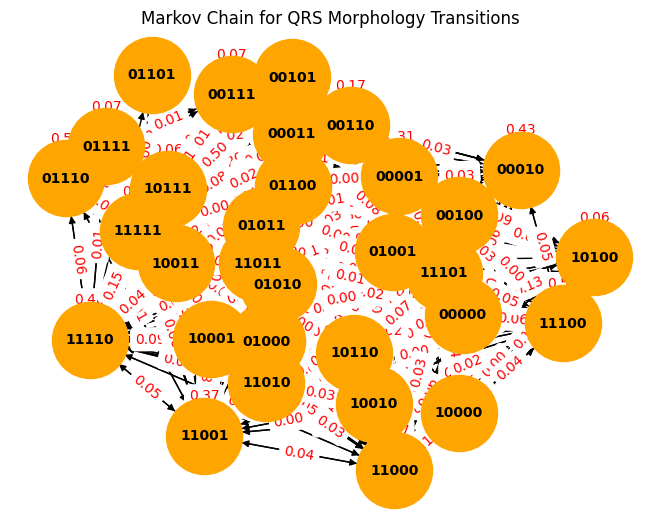

Simulated Sequence of Morphology States:
['00000', '00000', '00001', '00000', '00001', '11110', '11011', '00011', '00111', '00001', '00001', '10000', '00000', '10001', '10001', '10001', '10000', '11000', '10000', '10001', '00001']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/cardiac_arrythmia_modelling_simulation/MIT-BIH Arrhythmia Database.csv')

# Extract QRS morphology columns (e.g., '0_qrs_morph0' to '0_qrs_morph4')
qrs_columns = ['0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4']

# Reduce dimensionality by creating a composite morphology pattern identifier
def create_morphology_states(row, thresholds):
    return ''.join(['1' if value > threshold else '0' for value, threshold in zip(row, thresholds)])

# Calculate thresholds (mean values of each QRS column)
thresholds = data[qrs_columns].mean().values

# Create a new column with the morphology state
data['qrs_state'] = data[qrs_columns].apply(lambda row: create_morphology_states(row, thresholds), axis=1)

# Create a Markov transition matrix
def calculate_transition_matrix(sequence):
    transitions = Counter((sequence[i], sequence[i+1]) for i in range(len(sequence) - 1))
    states = sorted(sequence.unique())
    matrix = pd.DataFrame(0, index=states, columns=states, dtype=float)

    for (from_state, to_state), count in transitions.items():
        matrix.loc[from_state, to_state] = count

    # Normalize rows to get probabilities
    matrix = matrix.div(matrix.sum(axis=1), axis=0).fillna(0)
    return matrix

transition_matrix = calculate_transition_matrix(data['qrs_state'])

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)

# Visualize the Markov chain
def plot_markov_chain(matrix):
    graph = nx.DiGraph()
    for from_state in matrix.index:
        for to_state in matrix.columns:
            prob = matrix.loc[from_state, to_state]
            if prob > 0:
                graph.add_edge(from_state, to_state, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'label')
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='orange', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Markov Chain for QRS Morphology Transitions")
    plt.show()

plot_markov_chain(transition_matrix)

# Simulate morphology transitions
def simulate_markov_chain(matrix, start_state, steps):
    current_state = start_state
    states = [current_state]

    for _ in range(steps):
        probabilities = matrix.loc[current_state]
        next_state = np.random.choice(probabilities.index, p=probabilities.values)
        states.append(next_state)
        current_state = next_state

    return states

#  start with a specific morphology state and simulate 20 transitions
start_state = '00000'
simulated_states = simulate_markov_chain(transition_matrix, start_state, 20)
print("Simulated Sequence of Morphology States:")
print(simulated_states)